In [1968]:
from PIL import Image
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
from sklearn import metrics
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve

In [1969]:
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [1970]:
classes = ['Tesla Model S Sedan 2012','Toyota Sequoia SUV 2012', 'Infiniti G Coupe IPL 2012', 'Lamborghini Aventador Coupe 2012', 'HUMMER H3T Crew Cab 2010']
print(len(classes))

5


# Without Transfer Learning (64 x 64)

In [1971]:
images = []
image_classes = []

for i in range(len(classes)):
    imagePaths = glob.glob('./dataset/custom/' + classes[i] + '/*.jpg')
    imageCount = 0
    for imgPath in imagePaths:
        if imageCount < 1000:
            imageCount += 1
            img = Image.open(imgPath).convert("RGB")
            img = img.resize((64, 64))
            img.load()
            data = np.asarray(img, dtype="int32")
            images.append(data)
            image_classes.append(i)
            

        
images = np.array(images)
image_classes = np.array(image_classes)

print(images.shape)
print(image_classes.shape)
print(len(classes))

(5000, 64, 64, 3)
(5000,)
5


In [1972]:
x_train, x_test, y_train, y_test = train_test_split(images, image_classes, stratify=image_classes, random_state=123, shuffle=True, test_size=0.7)

In [1973]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


print(np.unique(image_classes))
print(np.unique(y_train))
print(np.unique(y_test))

(1500, 64, 64, 3)
(3500, 64, 64, 3)
(1500,)
(3500,)
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]


x_train shape: (1500, 64, 64, 3)
y_train shape: (1500,)
x_test shape: (3500, 64, 64, 3)
y_test shape: (3500,)
Toyota Sequoia SUV 2012


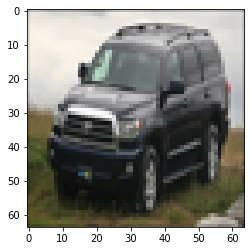

In [1974]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

plt.imshow(x_train[0])
print(classes[y_train[0]])

In [1975]:
# previous shape
print(y_train.shape)
print(y_test.shape)


(1500,)
(3500,)


In [1976]:
print(len(classes))
y_train = tf.keras.utils.to_categorical(y_train, len(classes))
y_test = tf.keras.utils.to_categorical(y_test, len(classes))


print(np.unique(y_train))
print(np.unique(y_test))

5
[0. 1.]
[0. 1.]


In [1977]:
# after shape
print(y_train.shape)
print(y_test.shape)

(1500, 5)
(3500, 5)


In [1978]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255



print(x_train)
print(x_test)

[[[[0.6509804  0.64705884 0.627451  ]
   [0.7294118  0.72156864 0.7058824 ]
   [0.7294118  0.7137255  0.7019608 ]
   ...
   [0.69411767 0.6901961  0.68235296]
   [0.69803923 0.69411767 0.6862745 ]
   [0.6313726  0.627451   0.61960787]]

  [[0.827451   0.8156863  0.79607844]
   [0.9098039  0.8980392  0.8784314 ]
   [0.90588236 0.8901961  0.87058824]
   ...
   [0.84705883 0.84313726 0.8352941 ]
   [0.85490197 0.8509804  0.84313726]
   [0.78431374 0.78039217 0.77254903]]

  [[0.8352941  0.81960785 0.7921569 ]
   [0.9137255  0.8980392  0.87058824]
   [0.90588236 0.8862745  0.85882354]
   ...
   [0.8352941  0.83137256 0.8235294 ]
   [0.84313726 0.8392157  0.83137256]
   [0.76862746 0.7647059  0.75686276]]

  ...

  [[0.28627452 0.29411766 0.13725491]
   [0.34117648 0.34509805 0.16078432]
   [0.33333334 0.33333334 0.14509805]
   ...
   [0.32156864 0.28627452 0.2509804 ]
   [0.3647059  0.33333334 0.29411766]
   [0.38431373 0.36078432 0.32156864]]

  [[0.27058825 0.2784314  0.12941177]
   [0.3

In [1979]:
from tensorflow.keras.optimizers import SGD
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(x_train.shape[1], x_train.shape[2], 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='softmax'))

In [1980]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0001))

model.fit(x_train, y_train, epochs=100, verbose=1 ,callbacks=[monitor], validation_data=(x_test, y_test))

Train on 1500 samples, validate on 3500 samples
1500/1500 [==============================] - 88s 59ms/sample - loss: 1.3567 - val_loss: 1.0614


In [1981]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

y_true = np.argmax(y_test ,axis=1)

score = metrics.accuracy_score(y_true, pred)
print('Precision: {}'.format(score))

r1 = metrics.recall_score(y_true, pred, average='weighted')
print('Recall : {}'.format(r1))

f1 = metrics.f1_score(y_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))

print(metrics.classification_report(y_true, pred))

Precision: 0.6062857142857143
Recall : 0.6062857142857143
Averaged F1: 0.6181289298466184
              precision    recall  f1-score   support

           0       0.94      0.38      0.54       700
           1       0.78      0.56      0.65       700
           2       0.37      0.97      0.54       700
           3       0.83      0.48      0.61       700
           4       0.90      0.65      0.75       700

    accuracy                           0.61      3500
   macro avg       0.76      0.61      0.62      3500
weighted avg       0.76      0.61      0.62      3500



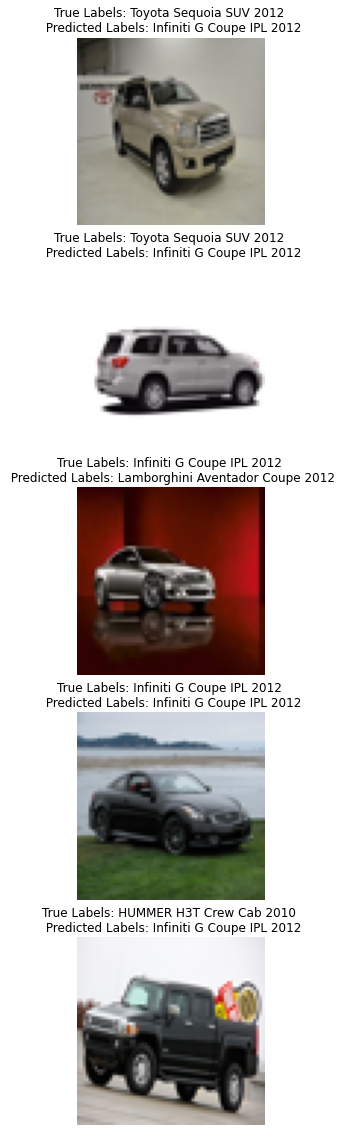

In [1982]:
fig = plt.figure(figsize=(20, 20))

rows = 5

images = x_test[0:rows];

for i in range(len(images)):
  fig.add_subplot(rows, 1, i+1)

  plt.imshow(x_test[i])
  plt.axis('off')
  plt.title("True Labels: {} \n Predicted Labels: {}".format(classes[y_true[i]], classes[pred[i]]))

# With Transfer Learning (64 x 64)

In [1983]:
images = []
image_classes = []

for i in range(len(classes)):
    imagePaths = glob.glob('./dataset/custom/' + classes[i] + '/*.jpg')
    imageCount = 0
    for imgPath in imagePaths:
        if imageCount < 1000:
            imageCount += 1
            img = Image.open(imgPath).convert("RGB")
            img = img.resize((64, 64))
            img.load()
            data = np.asarray(img, dtype="int32")
            images.append(data)
            image_classes.append(i)
            

        
images = np.array(images)
image_classes = np.array(image_classes)

print(images.shape)
print(image_classes.shape)
print(len(classes))

(5000, 64, 64, 3)
(5000,)
5


In [1984]:
x_train, x_test, y_train, y_test = train_test_split(images, image_classes, stratify=image_classes, random_state=123, shuffle=True, test_size=0.7)

In [1985]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


print(np.unique(image_classes))
print(np.unique(y_train))
print(np.unique(y_test))

(1500, 64, 64, 3)
(3500, 64, 64, 3)
(1500,)
(3500,)
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]


In [1986]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (1500, 64, 64, 3)
y_train shape: (1500,)
x_test shape: (3500, 64, 64, 3)
y_test shape: (3500,)


Toyota Sequoia SUV 2012


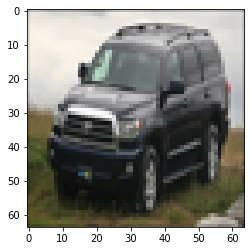

In [1987]:
plt.imshow(x_train[0])
print(classes[y_train[0]])

In [1988]:
# previous shape
print(y_train.shape)
print(y_test.shape)


(1500,)
(3500,)


In [1989]:
print(len(classes))
y_train = tf.keras.utils.to_categorical(y_train, len(classes))
y_test = tf.keras.utils.to_categorical(y_test, len(classes))


print(np.unique(y_train))
print(np.unique(y_test))

5
[0. 1.]
[0. 1.]


In [1990]:
# after shape
print(y_train.shape)
print(y_test.shape)

(1500, 5)
(3500, 5)


In [1991]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255



print(x_train)
print(x_test)

[[[[0.6509804  0.64705884 0.627451  ]
   [0.7294118  0.72156864 0.7058824 ]
   [0.7294118  0.7137255  0.7019608 ]
   ...
   [0.69411767 0.6901961  0.68235296]
   [0.69803923 0.69411767 0.6862745 ]
   [0.6313726  0.627451   0.61960787]]

  [[0.827451   0.8156863  0.79607844]
   [0.9098039  0.8980392  0.8784314 ]
   [0.90588236 0.8901961  0.87058824]
   ...
   [0.84705883 0.84313726 0.8352941 ]
   [0.85490197 0.8509804  0.84313726]
   [0.78431374 0.78039217 0.77254903]]

  [[0.8352941  0.81960785 0.7921569 ]
   [0.9137255  0.8980392  0.87058824]
   [0.90588236 0.8862745  0.85882354]
   ...
   [0.8352941  0.83137256 0.8235294 ]
   [0.84313726 0.8392157  0.83137256]
   [0.76862746 0.7647059  0.75686276]]

  ...

  [[0.28627452 0.29411766 0.13725491]
   [0.34117648 0.34509805 0.16078432]
   [0.33333334 0.33333334 0.14509805]
   ...
   [0.32156864 0.28627452 0.2509804 ]
   [0.3647059  0.33333334 0.29411766]
   [0.38431373 0.36078432 0.32156864]]

  [[0.27058825 0.2784314  0.12941177]
   [0.3

In [1992]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

model = Sequential()

for layer in vgg_model.layers:
  model.add(layer)

model.summary()

Model: "sequential_104"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 16, 16, 256)    

In [1993]:
for layer in model.layers:
  layer.trainable = False

In [1994]:

model.add(Flatten())
model.add(Dense(1024))
model.add(Dense(1024))
model.add(Dense(len(classes), activation="softmax"))

###### model.summary()

In [1995]:
print(x_test.shape)
print(y_test.shape)

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0001))

model.fit(x_train, y_train, epochs=100, verbose=1 ,callbacks=[monitor], validation_data=(x_test, y_test))

(3500, 64, 64, 3)
(3500, 5)
Train on 1500 samples, validate on 3500 samples
1500/1500 [==============================] - 363s 242ms/sample - loss: 1.0382 - val_loss: 0.4685


In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

y_true = np.argmax(y_test ,axis=1)

score = metrics.accuracy_score(y_true, pred)
print('Precision: {}'.format(score))

r1 = metrics.recall_score(y_true, pred, average='weighted')
print('Recall : {}'.format(r1))

f1 = metrics.f1_score(y_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))

print(metrics.classification_report(y_true, pred))

In [ ]:
fig = plt.figure(figsize=(20, 20))

rows = 5

images = x_test[0:rows];

for i in range(len(images)):
  fig.add_subplot(rows, 1, i+1)

  plt.imshow(x_test[i])
  plt.axis('off')
  plt.title("True Labels: {} \n Predicted Labels: {}".format(classes[y_true[i]], classes[pred[i]]))

# Without Transfer Learning (200 x 200)


In [ ]:
images = []
image_classes = []

for i in range(len(classes)):
    imagePaths = glob.glob('./dataset/custom/' + classes[i] + '/*.jpg')
    imageCount = 0
    for imgPath in imagePaths:
        if imageCount < 1000:
            imageCount += 1
            img = Image.open(imgPath).convert("RGB")
            img = img.resize((200, 200))
            img.load()
            data = np.asarray(img, dtype="int32")
            images.append(data)
            image_classes.append(i)
            

        
images = np.array(images)
image_classes = np.array(image_classes)

print(images.shape)
print(image_classes.shape)
print(len(classes))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, image_classes, stratify=image_classes, random_state=123, shuffle=True, test_size=0.7)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


print(np.unique(image_classes))
print(np.unique(y_train))
print(np.unique(y_test))

In [ ]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

plt.imshow(x_train[0])
print(classes[y_train[0]])

In [ ]:
# previous shape
print(y_train.shape)
print(y_test.shape)


In [ ]:
print(len(classes))
y_train = tf.keras.utils.to_categorical(y_train, len(classes))
y_test = tf.keras.utils.to_categorical(y_test, len(classes))


print(np.unique(y_train))
print(np.unique(y_test))

In [ ]:
# after shape
print(y_train.shape)
print(y_test.shape)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255



print(x_train)
print(x_test)

In [ ]:
from tensorflow.keras.optimizers import SGD
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(x_train.shape[1], x_train.shape[2], 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='softmax'))

In [ ]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0001))

model.fit(x_train, y_train, epochs=100, verbose=1 ,callbacks=[monitor], validation_data=(x_test, y_test))

In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

y_true = np.argmax(y_test ,axis=1)

score = metrics.accuracy_score(y_true, pred)
print('Precision: {}'.format(score))

r1 = metrics.recall_score(y_true, pred, average='weighted')
print('Recall : {}'.format(r1))

f1 = metrics.f1_score(y_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))

print(metrics.classification_report(y_true, pred))

In [ ]:
fig = plt.figure(figsize=(20, 20))

rows = 5

images = x_test[0:rows];

for i in range(len(images)):
  fig.add_subplot(rows, 1, i+1)

  plt.imshow(x_test[i])
  plt.axis('off')
  plt.title("True Labels: {} \n Predicted Labels: {}".format(classes[y_true[i]], classes[pred[i]]))

# With Transfer Learning (200 x 200)

In [ ]:
images = []
image_classes = []

for i in range(len(classes)):
    imagePaths = glob.glob('./dataset/custom/' + classes[i] + '/*.jpg')
    imageCount = 0
    for imgPath in imagePaths:
        if imageCount < 1000:
            imageCount += 1
            img = Image.open(imgPath).convert("RGB")
            img = img.resize((200, 200))
            img.load()
            data = np.asarray(img, dtype="int32")
            images.append(data)
            image_classes.append(i)
            

        
images = np.array(images)
image_classes = np.array(image_classes)

print(images.shape)
print(image_classes.shape)
print(len(classes))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, image_classes, stratify=image_classes, random_state=123, shuffle=True, test_size=0.7)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


print(np.unique(image_classes))
print(np.unique(y_train))
print(np.unique(y_test))

In [ ]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

In [ ]:
plt.imshow(x_train[0])
print(classes[y_train[0]])

In [ ]:
# previous shape
print(y_train.shape)
print(y_test.shape)


In [ ]:
print(len(classes))
y_train = tf.keras.utils.to_categorical(y_train, len(classes))
y_test = tf.keras.utils.to_categorical(y_test, len(classes))


print(np.unique(y_train))
print(np.unique(y_test))

In [ ]:
# after shape
print(y_train.shape)
print(y_test.shape)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255



print(x_train)
print(x_test)

In [ ]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

model = Sequential()

for layer in vgg_model.layers:
  model.add(layer)

model.summary()

In [ ]:
for layer in model.layers:
  layer.trainable = False

In [ ]:

model.add(Flatten())
model.add(Dense(1024))
model.add(Dense(1024))
model.add(Dense(len(classes), activation="softmax"))

In [ ]:
print(x_test.shape)
print(y_test.shape)

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0001))

model.fit(x_train, y_train, epochs=100, verbose=1 ,callbacks=[monitor], validation_data=(x_test, y_test))

In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

y_true = np.argmax(y_test ,axis=1)

score = metrics.accuracy_score(y_true, pred)
print('Precision: {}'.format(score))

r1 = metrics.recall_score(y_true, pred, average='weighted')
print('Recall : {}'.format(r1))

f1 = metrics.f1_score(y_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))

print(metrics.classification_report(y_true, pred))

In [ ]:
fig = plt.figure(figsize=(20, 20))

rows = 5

images = x_test[0:rows];

for i in range(len(images)):
  fig.add_subplot(rows, 1, i+1)

  plt.imshow(x_test[i])
  plt.axis('off')
  plt.title("True Labels: {} \n Predicted Labels: {}".format(classes[y_true[i]], classes[pred[i]]))